In [7]:
import numpy as np
import pyvista

pyvista.set_jupyter_backend("static")

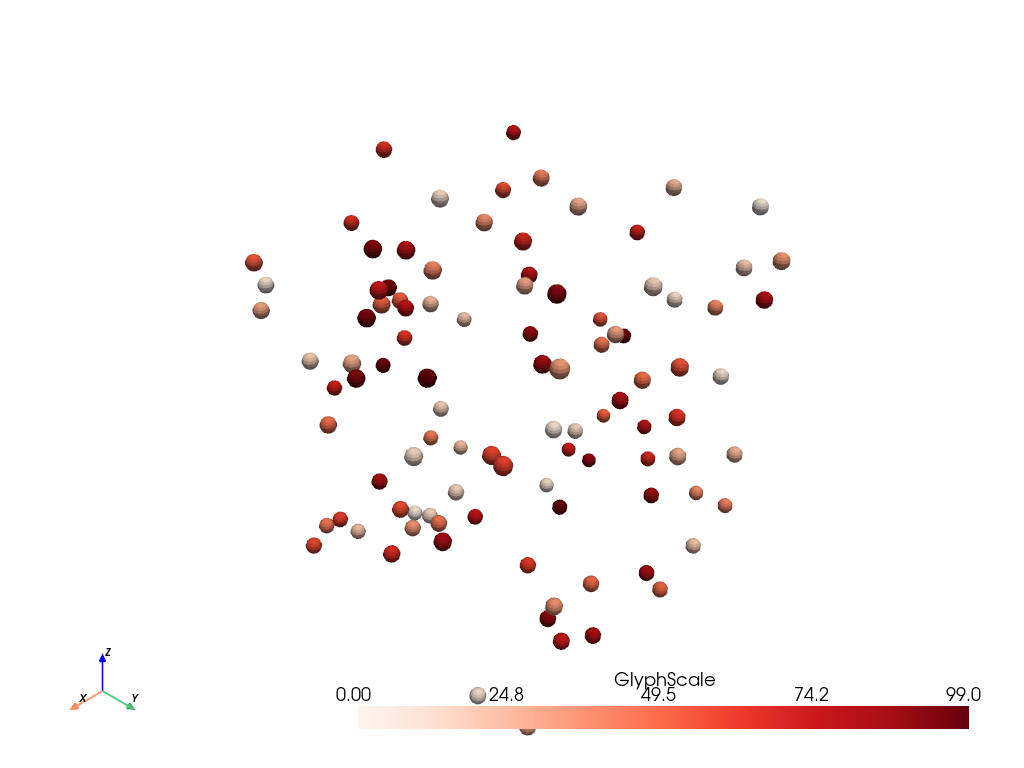

In [8]:
rng = np.random.default_rng(seed=0)
point_cloud = rng.random((100, 3))
pdata = pyvista.PolyData(point_cloud)
pdata['orig_sphere'] = np.arange(100)

# create many spheres from the point cloud
sphere = pyvista.Sphere(radius=0.02, phi_resolution=10, theta_resolution=10)
pc = pdata.glyph(scale=False, geom=sphere, orient=False)
pc.plot(cmap='Reds')

In [10]:
# create a PolyData object
np_points = np.array([[0, 0, 0], [1, 0, 0], [0.8, 1.2, 0], [-0.2, 1, 0]])
pc = pyvista.PolyData(np_points)

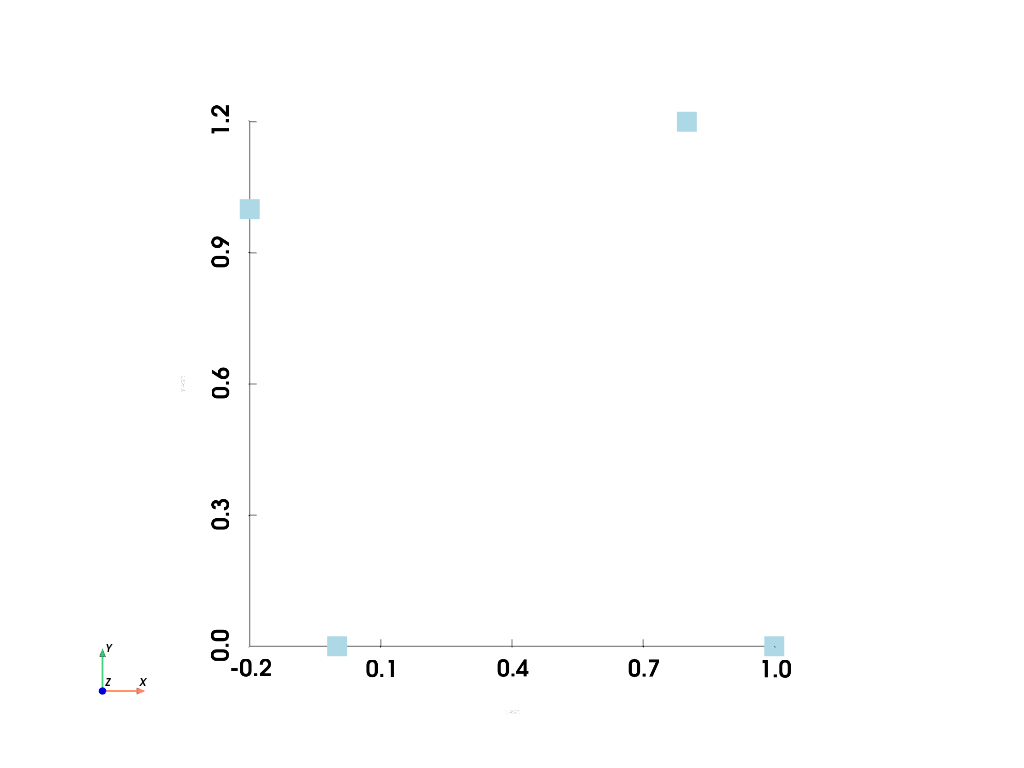

In [16]:
pc.plot(show_bounds=True, show_edges=True, point_size=20, cpos="xy")

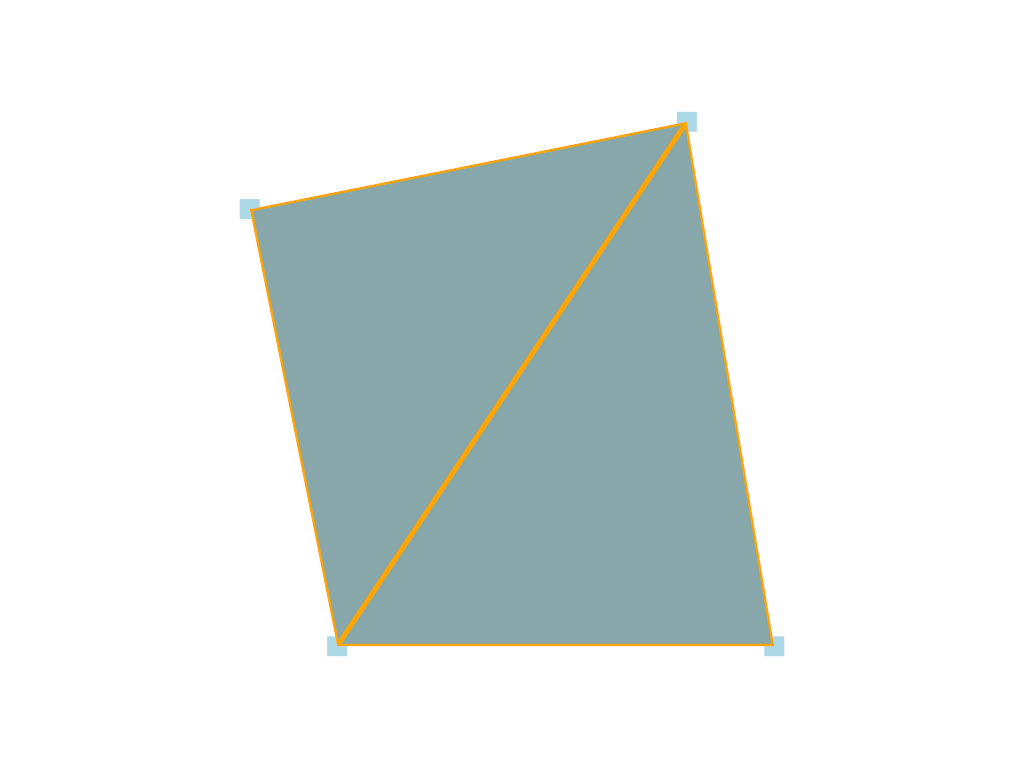

In [41]:
cells = [3, 0, 1, 2, 3, 2, 3, 0]
mesh = pyvista.PolyData(np_points, cells)
pl = pyvista.Plotter()
pl.add_points(pc, point_size=20)
pl.add_mesh(mesh, show_edges=True, line_width=5, edge_color="orange")
pl.show(cpos="xy")

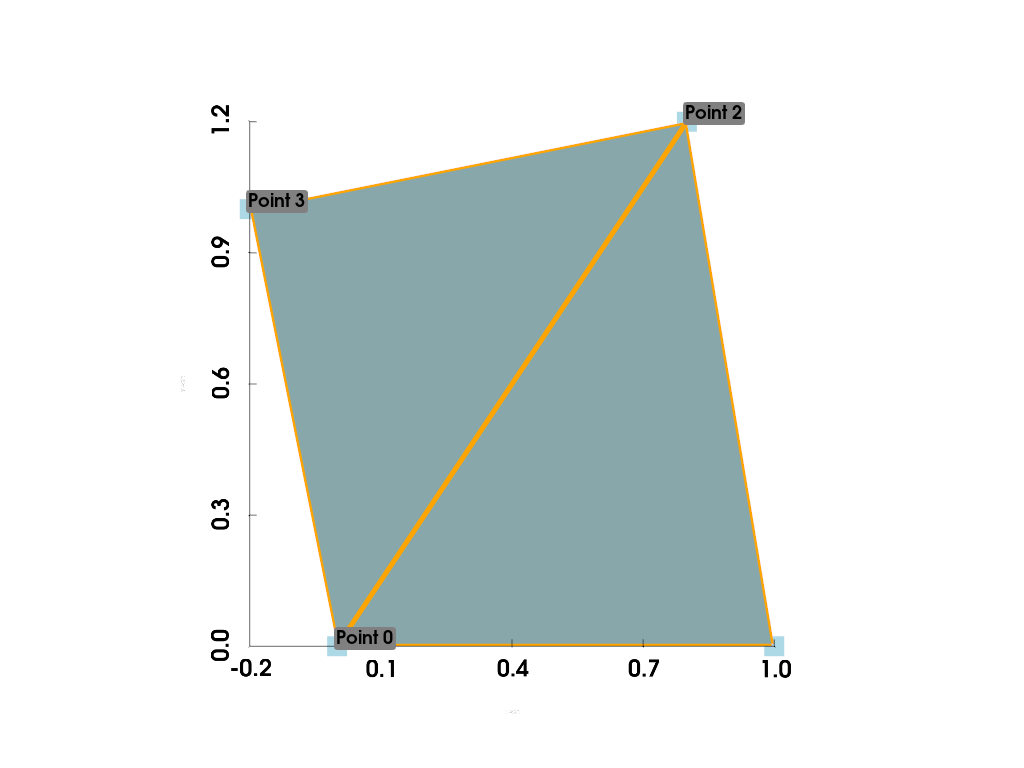

In [42]:
# annotate the points
pl = pyvista.Plotter()
pl.add_points(pc, point_size=20)
pl.add_mesh(mesh, show_edges=True, line_width=5, edge_color="orange")
pl.add_point_labels(np_points, [f"Point {i}" for i in range(4)])
pl.show_bounds()
pl.show(cpos="xy")

In [43]:
mesh.faces

array([3, 0, 1, 2, 3, 2, 3, 0], dtype=int64)

In [44]:
grid = pyvista.ImageData(dimensions=(3, 3, 1))
ugrid = grid.cast_to_unstructured_grid()

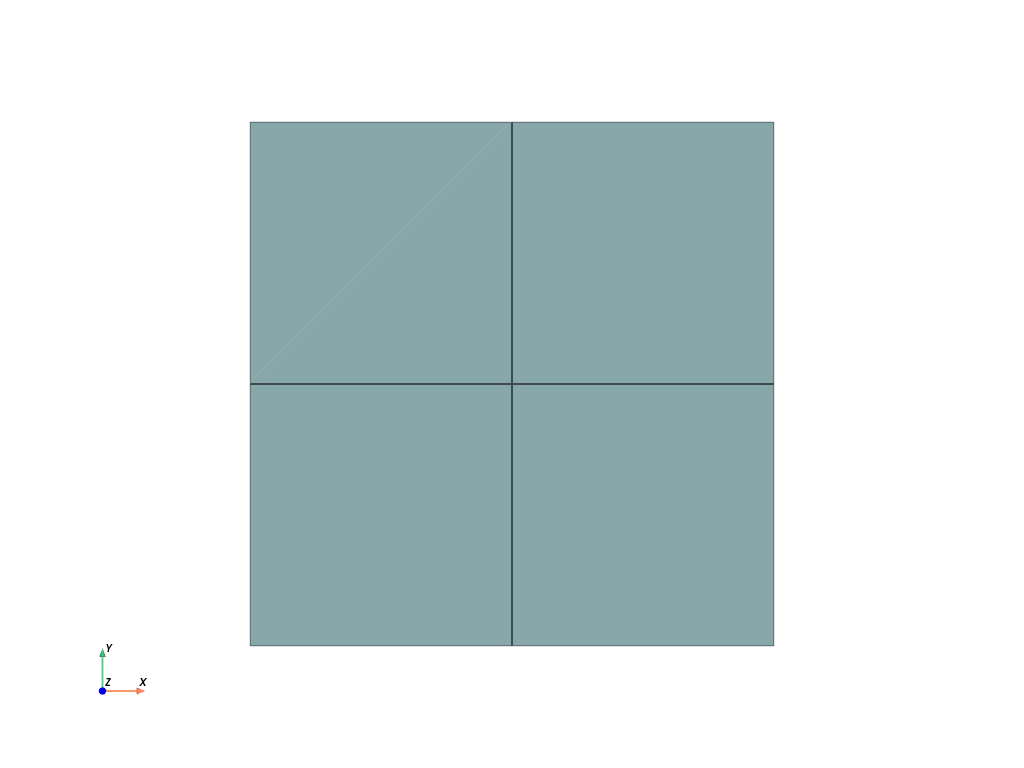

In [47]:
ugrid.plot(show_edges=True, cpos="xy")

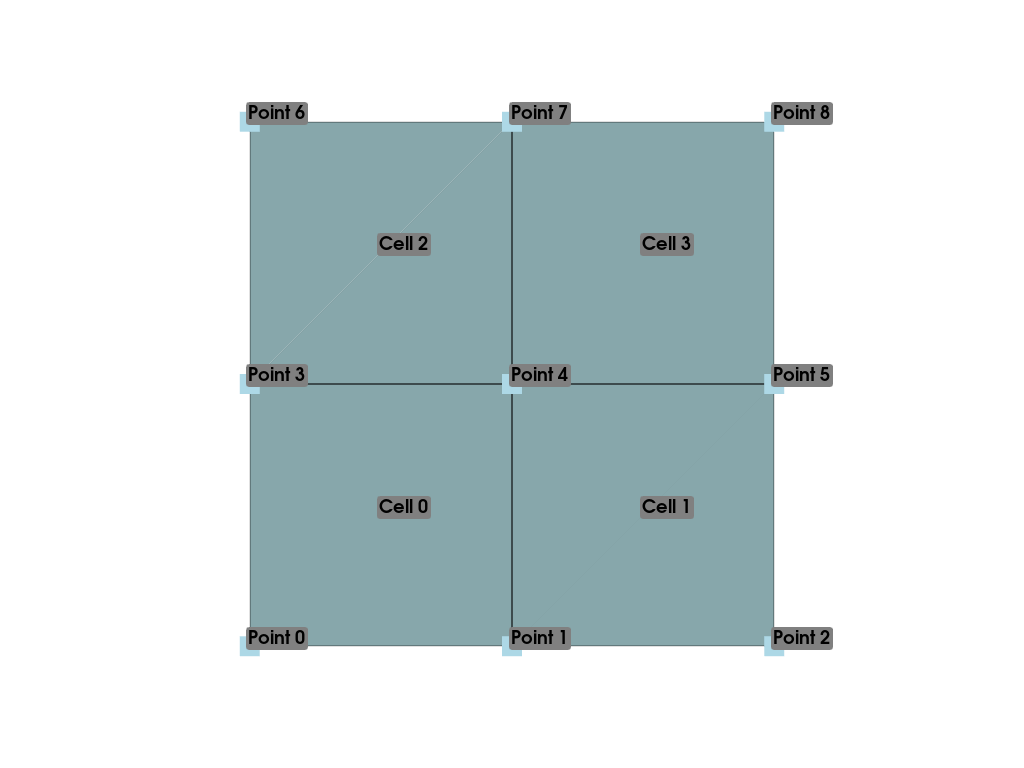

In [58]:
n = ugrid.n_points
pl = pyvista.Plotter()
pl.add_mesh(ugrid, show_edges=True)
pl.add_points(ugrid.points, point_size=20)
pl.add_point_labels(ugrid.points[:n], [f"Point {i}" for i in range(n)])
pl.add_point_labels(ugrid.cell_centers(), [f"Cell {i}" for i in range(ugrid.n_cells)])
pl.camera_position = "xy"
pl.show()

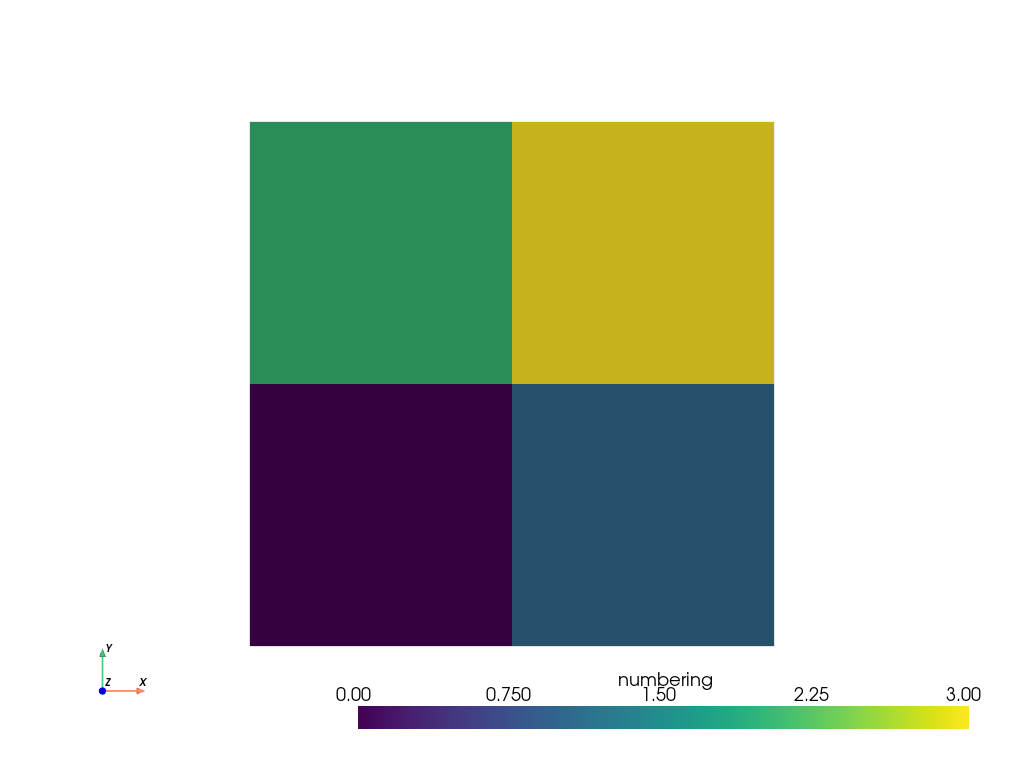

In [61]:
# cell data

ugrid.cell_data["numbering"] = np.arange(ugrid.n_cells)
ugrid.plot(cpos="xy")

In [64]:
ugrid.cell_data["rn"] = [4,3,2,1]

In [67]:
ugrid.set_active_scalars("rn")

(<FieldAssociation.CELL: 1>, pyvista_ndarray([4, 3, 2, 1]))

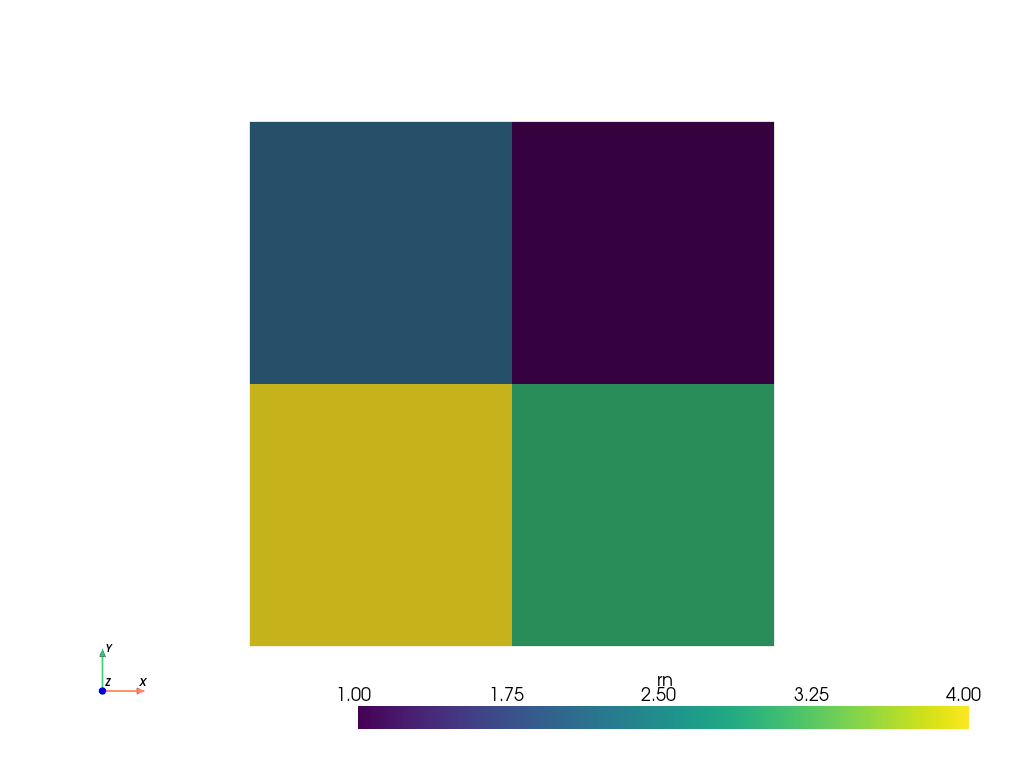

In [69]:
ugrid.plot(cpos="xy")

In [75]:
from dolfinx.io import gmshio

ModuleNotFoundError: No module named 'dolfinx'